In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
# Fungsi untuk memuat dataset MNIST dan membuat data loader
def load_mnist_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    return trainloader, testloader

In [ ]:
# Fungsi untuk menampilkan beberapa gambar dari dataset MNIST
def visualize_mnist_samples(trainloader, num_samples=5):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

In [ ]:
# Desain model Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Fungsi untuk melatih model
def train_model(trainloader, model, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader)}')

    print('Finished Training')

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(testloader, model):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')

    return accuracy, cm, f1, precision, recall

100%|██████████| 9912422/9912422 [00:00<00:00, 84652824.99it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94049451.73it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21737627.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16366433.65it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



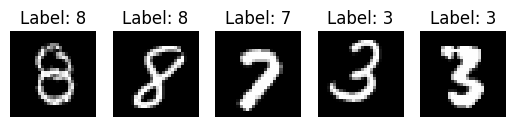

Epoch 1/10, Loss: 0.37736934295563557
Epoch 2/10, Loss: 0.19449660880590425
Epoch 3/10, Loss: 0.1412028890124945
Epoch 4/10, Loss: 0.11387113945236974
Epoch 5/10, Loss: 0.09750639845275565
Epoch 6/10, Loss: 0.0853606274382257
Epoch 7/10, Loss: 0.07688133043052355
Epoch 8/10, Loss: 0.06838085030717875
Epoch 9/10, Loss: 0.06135576980824926
Epoch 10/10, Loss: 0.05758111714484738
Finished Training
Accuracy: 0.9734
Confusion Matrix:
[[ 955    0    0    1    2    6    6    1    5    4]
 [   0 1123    2    2    0    0    1    0    7    0]
 [   4    1  982   15    6    1    2    8   13    0]
 [   0    1    1  995    0    5    0    1    2    5]
 [   0    0    1    1  961    0    6    2    0   11]
 [   2    0    0   12    2  867    3    0    3    3]
 [   3    3    2    1    8    4  936    0    1    0]
 [   0    4    6    5    4    0    0  995    2   12]
 [   3    0    2    9    5    4    2    3  944    2]
 [   0    5    0    8    8    4    2    2    4  976]]
F1 Score: 0.973415089340411
Precision

In [ ]:
# Main function untuk menjalankan seluruh workflow
def main():
    trainloader, testloader = load_mnist_data()
    visualize_mnist_samples(trainloader)

    model = SimpleNN()
    train_model(trainloader, model, num_epochs=10, learning_rate=0.001)

    accuracy, cm, f1, precision, recall = evaluate_model(testloader, model)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(cm)
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

if __name__ == "__main__":
    main()

**Bonus Task**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
# Fungsi untuk memuat dataset MNIST dan membuat data loader
def load_mnist_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    return trainloader, testloader

In [ ]:
# Desain model Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Fungsi untuk melatih model dengan konfigurasi tertentu
def train_model(trainloader, model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader)}')

    print('Finished Training')

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(testloader, model):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')

    return accuracy, cm, f1, precision, recall

In [ ]:
# Fungsi untuk membandingkan tiga konfigurasi dengan loss function berbeda
def compare_loss_functions():
    trainloader, testloader = load_mnist_data()
    model = SimpleNN()
    num_epochs = 10
    learning_rate = 0.001

    loss_functions = [nn.CrossEntropyLoss(), nn.NLLLoss(), nn.MultiMarginLoss()]
    loss_function_names = ["CrossEntropyLoss", "NLLLoss", "MultiMarginLoss"]

    for i, loss_function in enumerate(loss_functions):
        print(f"Training with {loss_function_names[i]}:")
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        model = SimpleNN()
        train_model(trainloader, model, loss_function, optimizer, num_epochs)
        accuracy, _, f1, precision, recall = evaluate_model(testloader, model)
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print("\n")

if __name__ == "__main__":
    compare_loss_functions()

Training with CrossEntropyLoss:
Epoch 1/10, Loss: 2.317066758680445
Epoch 2/10, Loss: 2.3170752914221304
Epoch 3/10, Loss: 2.317050183505646
Epoch 4/10, Loss: 2.317084343194453
Epoch 5/10, Loss: 2.3170961215297803
Epoch 6/10, Loss: 2.3170598239532665
Epoch 7/10, Loss: 2.31707098260363
Epoch 8/10, Loss: 2.317086809225428
Epoch 9/10, Loss: 2.317077217325727
Epoch 10/10, Loss: 2.3170727219408764
Finished Training


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.0978
F1 Score: 0.029008279037913674
Precision: 0.06421210598552939
Recall: 0.0978


Training with NLLLoss:
Epoch 1/10, Loss: -0.06846707763953576
Epoch 2/10, Loss: -0.06844873131799654
Epoch 3/10, Loss: -0.06842093033763741
Epoch 4/10, Loss: -0.06847710096846217
Epoch 5/10, Loss: -0.06842050296793094
Epoch 6/10, Loss: -0.06847071064711074
Epoch 7/10, Loss: -0.0684488400940283
Epoch 8/10, Loss: -0.06844737283018694
Epoch 9/10, Loss: -0.06844924762795396
Epoch 10/10, Loss: -0.06842858236396501
Finished Training


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.0527
F1 Score: 0.02719173299211527
Precision: 0.08097650649900599
Recall: 0.0527


Training with MultiMarginLoss:
Epoch 1/10, Loss: 0.8993842528700066
Epoch 2/10, Loss: 0.8994453727309384
Epoch 3/10, Loss: 0.89946459452989
Epoch 4/10, Loss: 0.899446092688961
Epoch 5/10, Loss: 0.8994424447957386
Epoch 6/10, Loss: 0.8994443326362415
Epoch 7/10, Loss: 0.8994112237811343
Epoch 8/10, Loss: 0.8994174540551232
Epoch 9/10, Loss: 0.8994399270396243
Epoch 10/10, Loss: 0.8994270299416361
Finished Training
Accuracy: 0.0887
F1 Score: 0.05215486018651084
Precision: 0.07501776206472041
Recall: 0.0887




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. Nilai Akurasi dan Recall tertinggi sebesar 0.0978 yaitu berdasarkan Loss Function dengan CrossEntropyLoss
2. Nilai F1 Score tertinggi sebesar 0.05215486018651084 yaitu berdasarkan Loss Function dengan MultiMarginLoss
3. Nilai Presisi tertinggi sebesar 0.08097650649900599 yaitu berdasarkan Loss Function dengan NLLLoss
